<a href="https://colab.research.google.com/github/amit310/amitkumar/blob/master/fashion_mnist_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Fashion_Mnist CNN Model using Tensorflow

#import Libraries
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.2.0


In [3]:
#import fashion Mnist Datasets

fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape,x_test.shape#train set has 60,000 images and 28X28 pixels

((60000, 28, 28), (10000, 28, 28))

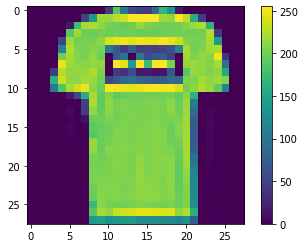

In [5]:
#to see the image for preprocessing
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#now scale the value of images into range 0 and 1
x_train=x_train/255.0
x_test=x_test/255.0

In [0]:
#lets display the 25 images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

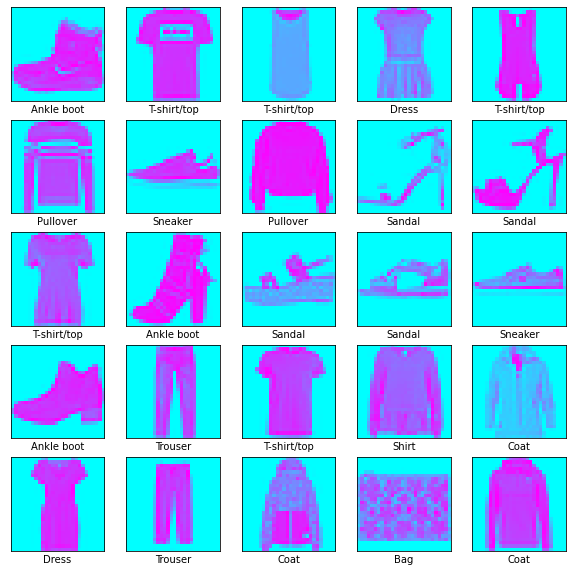

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.cool)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [21]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))

In [0]:
#Build Model

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32,3,activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(128,3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 128)        

In [30]:
model.fit(x_train,y_train,batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 49s 105ms/step - loss: 1.8676 - accuracy: 0.5997
Epoch 2/20
469/469 [==============================] - 49s 105ms/step - loss: 1.7281 - accuracy: 0.7365
Epoch 3/20
469/469 [==============================] - 49s 104ms/step - loss: 1.7069 - accuracy: 0.7560
Epoch 4/20
469/469 [==============================] - 49s 104ms/step - loss: 1.6905 - accuracy: 0.7722
Epoch 5/20
469/469 [==============================] - 49s 104ms/step - loss: 1.6811 - accuracy: 0.7808
Epoch 6/20
469/469 [==============================] - 49s 104ms/step - loss: 1.6742 - accuracy: 0.7876
Epoch 7/20
469/469 [==============================] - 49s 104ms/step - loss: 1.6680 - accuracy: 0.7942
Epoch 8/20
469/469 [==============================] - 49s 104ms/step - loss: 1.6617 - accuracy: 0.8005
Epoch 9/20
469/469 [==============================] - 49s 104ms/step - loss: 1.6562 - accuracy: 0.8051
Epoch 10/20
469/469 [==============================] - 49s 105ms/step - l

In [31]:
#evaluate the model performance
score= model.evaluate(x_test,y_test, verbose=2)

print('\nTest loss:', score[0])
print('\nTest accuracy:', score[1])

313/313 - 3s - loss: 1.6071 - accuracy: 0.8539

Test loss: 1.6071324348449707

Test accuracy: 0.8539000153541565


In [0]:
#from above, we can say that, test accuracy is less than train accuracy on the training set.
this gap between training accuracy and test accuracy represents overfitting.

In [0]:
#make predictions
#With the model trained, we can use it to make predictions about some images. 
#The model's linear outputs, logits.
 #Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [0]:
model_prediction = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = model_prediction.predict(x_train)

In [0]:
predictions[0]

array([2.0040738e-11, 4.3903283e-14, 2.0430799e-17, 4.9732479e-12,
       1.3873118e-13, 1.4474450e-05, 2.4614104e-12, 5.4400121e-03,
       4.1863638e-11, 9.9454558e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
y_test[0]#prediction and test label is correct#this is Ankle boot

9

In [0]:
class_names[9]

'Ankle boot'

In [0]:
#for ten predictions with graph

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



In [0]:
#verify predictions

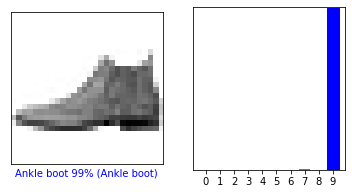

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

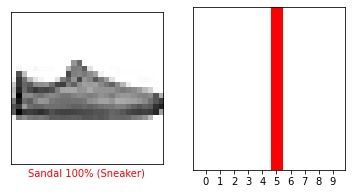

In [0]:
i =12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [0]:
#plot several images

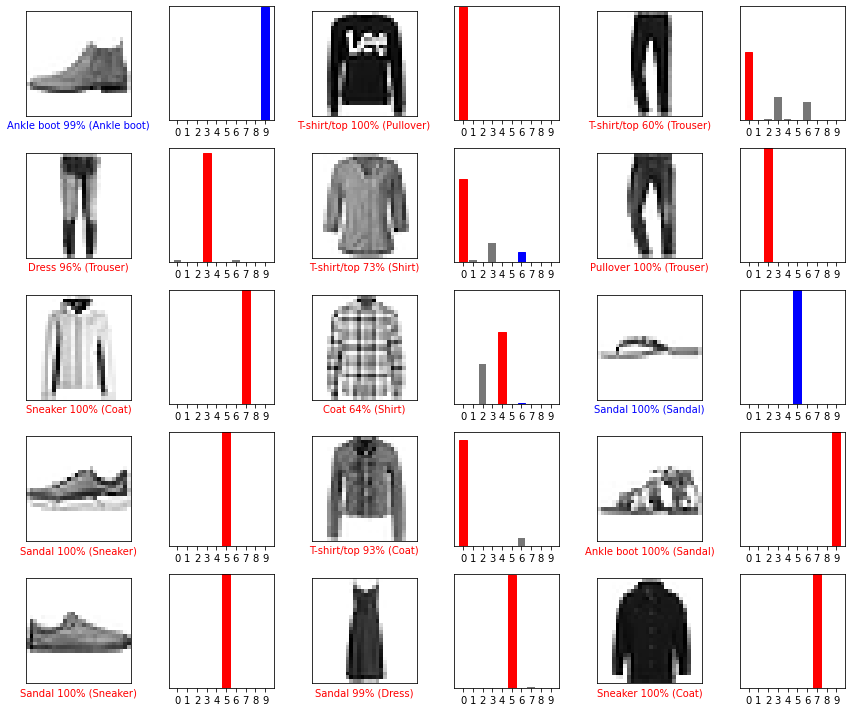

In [0]:
#Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()